<a href="https://colab.research.google.com/github/ParasNandwani/DeepLearningWithTensorflow/blob/master/TensorFlowLinearClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data=load_breast_cancer()

In [4]:
type(data)

sklearn.utils.Bunch

In [5]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [9]:
data.data.shape

(569, 30)

In [10]:
data.target_names 

array(['malignant', 'benign'], dtype='<U9')

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(data.data,data.target,test_size=0.33)

In [14]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(381, 30)
(381,)
(188, 30)
(188,)


In [15]:
N,D=X_train.shape

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
import tensorflow as tf

In [20]:
#Sequential groups a linear stack of layers into a tf.keras.Model.
model=tf.keras.Sequential([
                           tf.keras.layers.Input(shape=(D,)),
                           tf.keras.layers.Dense(1,activation='sigmoid')])
# Alternatively, we can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

In [21]:
#Configures the model for training.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
    )

In [22]:
r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 1.6869 - accuracy: 0.1969 - val_loss: 1.8258 - val_accuracy: 0.1543
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.5702 - accuracy: 0.2231 - val_loss: 1.6901 - val_accuracy: 0.1862
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.4579 - accuracy: 0.2520 - val_loss: 1.5615 - val_accuracy: 0.2340
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 1.3498 - accuracy: 0.2861 - val_loss: 1.4421 - val_accuracy: 0.2500
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 1.2551 - accuracy: 0.3255 - val_loss: 1.3260 - val_accuracy: 0.3032
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1630 - accuracy: 0.3701 - val_loss: 1.2203 - val_accuracy: 0.3245
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0787 - accuracy: 0.4173 - val_loss: 1.1238 - val_accuracy: 0.3617
Epoch 8/100


In [23]:
#Evaluate model
print("Train Score",model.evaluate(X_train,Y_train))
print("Test Score",model.evaluate(X_test,Y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1271 - accuracy: 0.9685
Train Score [0.12713658809661865, 0.9685039520263672]
6/6 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9840
Test Score [0.09806977212429047, 0.9840425252914429]


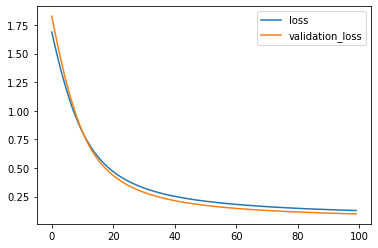

In [25]:
#Plot what returned by model
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='validation_loss')
plt.legend()

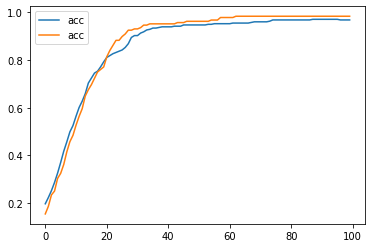

In [26]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='acc')
plt.legend()

# Model Predictions 

In [27]:
p=model.predict(X_test)

In [28]:
print(p)

[[9.08822775e-01]
 [9.68196273e-01]
 [4.33817208e-02]
 [2.05857754e-02]
 [9.25979018e-01]
 [9.76439536e-01]
 [8.01849365e-01]
 [5.64990461e-01]
 [8.59593630e-01]
 [9.64803278e-01]
 [9.98911738e-01]
 [4.31387343e-05]
 [7.19930828e-01]
 [8.99956226e-01]
 [1.17120147e-02]
 [9.92132246e-01]
 [4.34522778e-01]
 [9.77401316e-01]
 [9.43988085e-01]
 [7.17246830e-02]
 [9.83320951e-01]
 [1.01162046e-01]
 [9.62904453e-01]
 [3.73158038e-01]
 [1.72552466e-03]
 [4.67950433e-01]
 [9.11143661e-01]
 [9.78471935e-01]
 [6.52581453e-04]
 [4.47679371e-01]
 [9.72687900e-01]
 [9.58465159e-01]
 [9.71764326e-04]
 [8.81594241e-01]
 [9.61533546e-01]
 [6.71652913e-01]
 [9.63220477e-01]
 [1.31071538e-01]
 [9.61122394e-01]
 [2.65095770e-01]
 [2.89687723e-05]
 [9.51552749e-01]
 [3.68953049e-02]
 [9.73690152e-01]
 [8.63410711e-01]
 [2.29408741e-01]
 [7.10602343e-01]
 [1.90029740e-02]
 [9.49704289e-01]
 [8.57199775e-05]
 [7.21976757e-01]
 [8.41355562e-01]
 [9.97761905e-01]
 [9.22173381e-01]
 [9.62117076e-01]
 [9.895167

In [29]:
import numpy as np
p= np.round(p).flatten()
print(p)

[1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0.]


In [30]:
print("manually calculated",np.mean(p==Y_test))

manually calculated 0.9840425531914894


In [31]:
print("Evaluate output",model.evaluate(X_test,Y_test))

6/6 [==============================] - 0s 2ms/step - loss: 0.0981 - accuracy: 0.9840
Evaluate output [0.09806977212429047, 0.9840425252914429]


# Saving a model

In [32]:
#lets save model to file
model.save('linearclassifier.h5')

In [33]:
model=tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
print(model.evaluate(X_test,Y_test))

6/6 [==============================] - 0s 1ms/step - loss: 0.0981 - accuracy: 0.9840
[0.09806977212429047, 0.9840425252914429]
